# **Linear Regression**

In [0]:
# Importing some packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.datasets import california_housing
from scipy import stats
import seaborn as sns; sns.set()
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error




---


**The following function returns:**
dataset : dict-like object with the following attributes:

**dataset.data :** ndarray, shape [20640, 8]

    Each row corresponding to the 8 feature values in order.
**dataset.target :** numpy array of shape (20640,)

    Each value corresponds to the average house value in units of 100,000.
**dataset.feature_names :** array of length 8

    Array of ordered feature names used in the dataset.
**dataset.DESCR :** string

    Description of the California housing dataset.


---



In [0]:
housing_data = california_housing.fetch_california_housing()
housing_data

{'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geograp



---
The data contains 20,640 observations on 9 variables.

This dataset contains the **average house value as target variable**
and the following input variables (features): **average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude** in that order.

**Let us now extract the features and the target from the dataset and combine them in one data frame.**

---



In [0]:
Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])
df = Features.join(Target)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [0]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010




---

Let us use the function **df.corr()** to compute pairwise correlation of columns, excluding NA/null values.

---



In [0]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000




---

Let us consider only one feature say **MedInc**

---



In [0]:
df[['MedInc', 'Target']].describe()

,MedInc,Target
count,20640.000000,20640.000000
mean,3.870671,2.068558
std,1.899822,1.153956
min,0.499900,0.149990
25%,2.563400,1.196000
50%,3.534800,1.797000
75%,4.743250,2.647250
max,15.000100,5.000010


**Pre-Processing**

Notice that 75% of the data has price less than 2.65, but maximum price go as high as 5. Thus we should remove the extremely expensive houses which might prone noise.

In [0]:
df = df[df.Target < 5]

In [0]:
# Normalization of the MedInc and Target

def Norm(x):
  minx = x.min()
  maxx = x.max()
  return pd.Series([(i - minx)/(maxx-minx) for i in x])
x = Norm(df.MedInc)
y = Norm(df.Target)
print("maximum value of MedInc = {}".format(x.max()))
print("maximum value of Target = {}".format(y.max()))

maximum value of MedInc = 1.0
maximum value of Target = 1.0


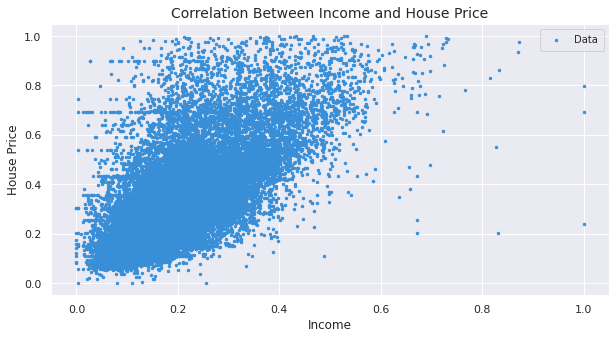

In [0]:
plt.figure(figsize=(10,5))
plt.scatter(x, y, label='Data', c='#388fd8', s=6)
plt.title('Correlation Between Income and House Price', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()

#**Linear Regression With scikit-learn**



---


There are five basic steps when you’re implementing linear regression:

1. Import the packages and classes you need.
2. Provide data to work with and eventually do appropriate transformations.
3. Create a regression model and fit it with existing data.
4. Check the results of model fitting to know whether the model is satisfactory.
5. Apply the model for predictions.


---



In [0]:
# Note X need to have one column and as many rows as necessary

X= np.array(x).reshape((-1, 1))
y=np.array(y)




---


This statement creates the variable model as the instance of LinearRegression. You can provide several optional parameters to LinearRegression:

1. fit_intercept is a Boolean (True by default) that decides whether to calculate the intercept 𝑏 (True) or consider it equal to zero (False).
2. normalize is a Boolean (False by default) that decides whether to normalize the input variables (True) or not (False).
3. copy_X is a Boolean (True by default) that decides whether to copy (True) or overwrite the input variables (False).
4. n_jobs is an integer or None (default) and represents the number of jobs used in parallel computation. None usually means one job and -1 to use all processors.


---




In [0]:
#create a linear regression model and fit it using the existing data
model = LinearRegression(normalize=False)


In [0]:
#fit(), you calculate the optimal values of the weights m and 𝑏, using the existing input and output (X and y) as the argument
model.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 0.10336187126396168
slope: [1.19772056]


In [0]:
y_pred = model.predict(X)

In [0]:
y_pred = model.intercept_ + model.coef_ * X
print('predicted response:', y_pred, sep='\n')

predicted response:
[[0.74973383]
 [0.74776795]
 [0.66153326]
 ...
 [0.20249047]
 [0.21630123]
 [0.25936902]]


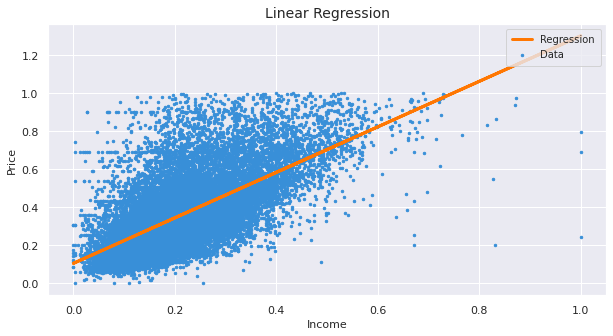

In [0]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.plot(X, y_pred, c='#ff7702', lw=3, label='Regression')
plt.title('Linear Regression', fontSize=14)
plt.xlabel('Income', fontSize=11)
plt.ylabel('Price', fontSize=11)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()

# **Linear Regression from Scratch**



---

We can represent the linear regression by the following equation:

**y = mx+b** 

where m is the slope, b is the intercept, and x is the median income.

---



In [0]:
class LinearRegression:
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.m = ((np.mean(X) * np.mean(y) - np.mean(X*y)) / ((np.mean(X)**2) - np.mean(X**2)))
        self.b = np.mean(y) - self.m * np.mean(X)
    
    def coeffs(self):
        return self.m, self.b
    
    def predict(self):
        self.y_pred = self.m * self.X + self.b
        return self.y_pred
    

In [0]:
X = df.MedInc
y = df.Target

In [0]:
lr = LinearRegression()

In [0]:
lr.fit(X, y)

In [0]:
y_pred = lr.predict()

In [0]:
m,b = lr.coeffs()

In [0]:
print("MSE:{}".format(mean_squared_error(y, y_pred)))
print("slope:{}".format(m))
print("intercept:{}".format(b))

MSE:0.5485962279736201
slope:0.39986877559797024
intercept:0.4504714514859456


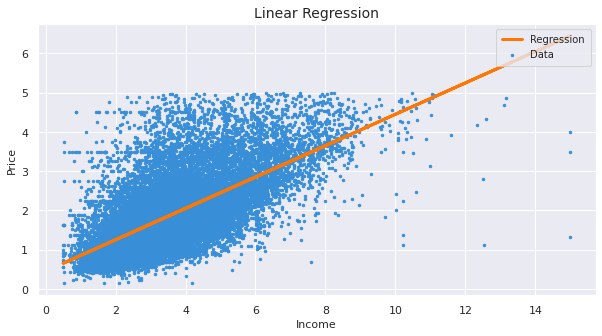

In [0]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.plot(X, y_pred, c='#ff7702', lw=3, label='Regression')
plt.title('Linear Regression', fontSize=14)
plt.xlabel('Income', fontSize=11)
plt.ylabel('Price', fontSize=11)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()

In [0]:
def gradient_descent(X, y, lr=0.05, epoch=10):
    
    m, b = 0.1, 0.1 # parameters
    mse = [] 
    N = len(X) # number of samples
    
    for _ in range(epoch):
                
        f = y - (m*X + b)
    
        # Updating m and b
        m -= lr * (-2 * X.dot(f).sum() / N)
        b -= lr * (-2 * f.sum() / N)
        mse.append(mean_squared_error(y, (m*X + b)))        
    
    return m, b, mse

MSE: 0.5546937005203618


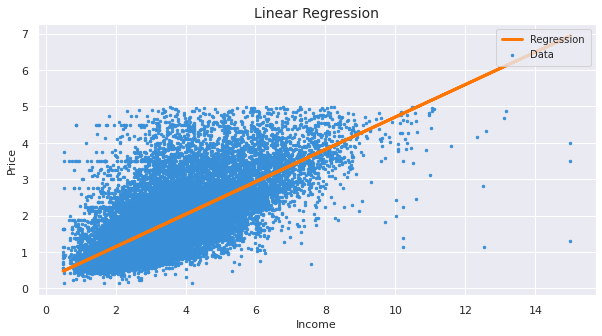

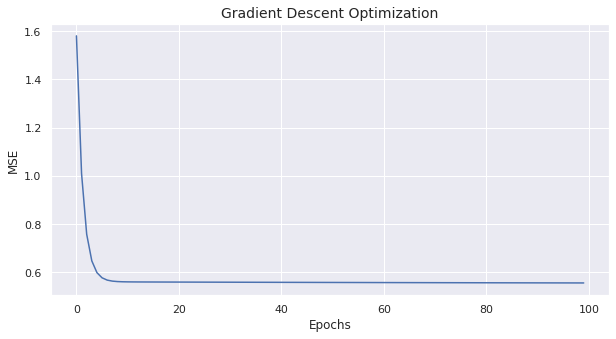

In [0]:
X = df.MedInc
y = df.Target

m, b, mse = gradient_descent(X, y, lr=0.01, epoch=100)

y_pred = m*X + b

print("MSE:",mean_squared_error(y, y_pred))

plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.plot(X, y_pred, c='#ff7702', lw=3, label='Regression')
plt.title('Linear Regression', fontSize=14)
plt.xlabel('Income', fontSize=11)
plt.ylabel('Price', fontSize=11)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()



plt.figure(figsize=(10,5))
plt.plot(range(len(mse)), mse)
plt.title('Gradient Descent Optimization', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

# **Ridge Regression**

In [0]:
# Let us use the same dataset california_housing
housing_data = california_housing.fetch_california_housing()

Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])
df = Features.join(Target)

housing_data.data = preprocessing.scale(housing_data.data)
X_train, X_test, y_train, y_test = train_test_split(
    housing_data.data, housing_data.target, test_size=0.3, random_state=10)

In [0]:
# initialize
ridge_reg = Ridge(alpha=0)
ridge_reg.fit(X_train, y_train)
ridge_df = pd.DataFrame({'variable': housing_data.feature_names, 'estimate': ridge_reg.coef_})
ridge_train_pred = []
ridge_test_pred = []

# iterate lambdas
for alpha in np.arange(0, 200, 1):
    # training
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    ridge_df[var_name] = ridge_reg.coef_
    # prediction
    ridge_train_pred.append(ridge_reg.predict(X_train))
    ridge_test_pred.append(ridge_reg.predict(X_test))

# organize dataframe
ridge_df = ridge_df.set_index('variable').T.rename_axis('estimate')
ridge_df

variable,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
estimate,,,,,,,,
estimate,0.837657,0.121767,-0.282765,0.359682,0.001481,-0.043425,-0.923852,-0.891802
estimate0,0.837657,0.121767,-0.282765,0.359682,0.001481,-0.043425,-0.923852,-0.891802
estimate1,0.837597,0.121861,-0.282527,0.359359,0.001511,-0.043439,-0.922939,-0.890877
estimate2,0.837537,0.121954,-0.282289,0.359036,0.001541,-0.043454,-0.922028,-0.889954
estimate3,0.837477,0.122047,-0.282051,0.358714,0.001571,-0.043468,-0.921119,-0.889033
...,...,...,...,...,...,...,...,...
estimate195,0.823546,0.136138,-0.238133,0.301703,0.006063,-0.045401,-0.778134,-0.743792
estimate196,0.823466,0.136195,-0.237919,0.301433,0.006081,-0.045408,-0.777522,-0.743169
estimate197,0.823387,0.136253,-0.237704,0.301163,0.006099,-0.045415,-0.776911,-0.742547


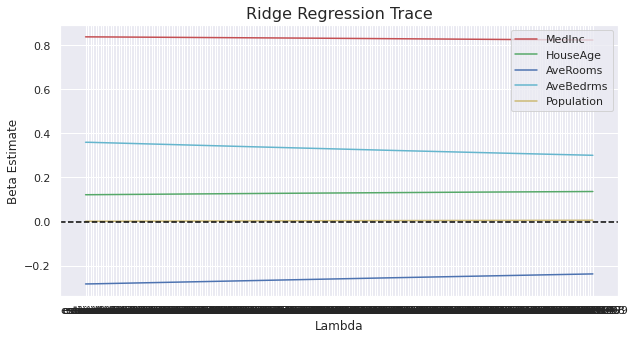

In [0]:
# plot betas by lambda
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ridge_df.MedInc, 'r', ridge_df.HouseAge, 'g', ridge_df.AveRooms, 'b', ridge_df.AveBedrms, 'c', ridge_df.Population, 'y')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel("Lambda")
ax.set_ylabel("Beta Estimate")
ax.set_title("Ridge Regression Trace", fontsize=16)
ax.legend(labels=['MedInc','HouseAge','AveRooms','AveBedrms','Population'])
ax.grid(True)

# **Logistic Regression**


---


 You can download the dataset from:
 https://www.kaggle.com/uciml/pima-indians-diabetes-database


---



In [0]:

df = pd.read_csv('/content/drive/My Drive/diabetes.csv')

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [0]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = df[feature_cols] # Features
y = df.Outcome # Target variable

In [0]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [0]:
# import the class
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)


y_pred=logreg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[117,  13],
       [ 24,  38]])

Text(0.5, 257.44, 'Predicted label')

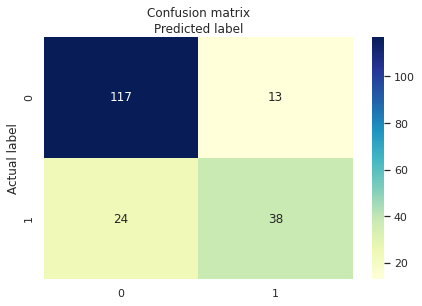

In [0]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [0]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8072916666666666
Precision: 0.7450980392156863
Recall: 0.6129032258064516


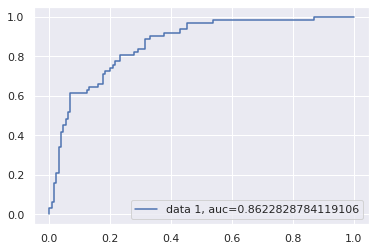

In [0]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#**Support Vector Machine**



---
Let us create a **linearly separable** dataset.


---



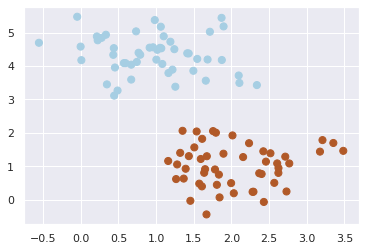

In [0]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired);
# print(X)
# print(y)

In [0]:
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

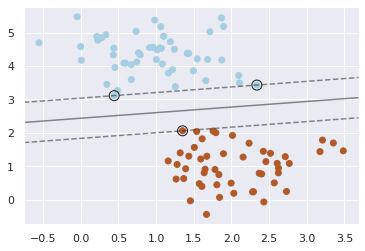

In [0]:


plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 10)
yy = np.linspace(ylim[0], ylim[1], 10)

YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

#decision_function(self, X) evaluates the decision function for the samples in X.
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [0]:
# the support vectors are:
clf.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [1.35139348, 2.06383637]])